In [19]:
import torch
import matplotlib.pyplot as plt

In [4]:
rand = torch.load('./Results/cifar10_SimBA_rand.pth')

In [5]:
cam =  torch.load('./Results/cifar10_SimBA_cam.pth')

# Success Rate

In [4]:
def correct_success_rate(success):  # 이전 simba.py 코드에 오류가 있어서 수정하는 함수 (현재 simba.py에서는 이 부분에 대해서 수정 완료)
    success_list = success.detach().clone()
    
    for data_idx in range(success_list.shape[0]):
        for i in range(len(success_list[data_idx])-1):
            if success_list[data_idx][i] > success_list[data_idx][i+1]:
                success_list[data_idx][i+1] = success_list[data_idx][i]
    return success_list

In [5]:
rand_success = rand['succs']

In [6]:
cam_success = cam['succs']

In [7]:
rand_success = correct_success_rate(rand_success)

In [8]:
cam_success = correct_success_rate(cam_success)

In [ ]:
rand_success_rate = rand_success.sum(0) / 1000

In [40]:
cam_success_rate = cam_success.sum(0) / 1000

In [11]:
import matplotlib.pyplot as plt

In [18]:
x_values= [x for x in range(0,3072*2,2)]

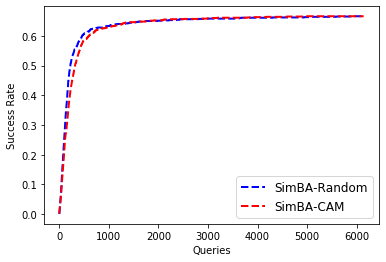

In [19]:
#plt.figure(figsize = (10,6))
plt.plot(x_values, rand_success_rate, 'b', linestyle = 'dashed', linewidth = 2, label = 'SimBA-Random')
plt.plot(x_values, cam_success_rate, 'r', linestyle = 'dashed', linewidth = 2, label = 'SimBA-CAM')
# plt.plot(x_values, rand_success_rate, 'b', linewidth = 2, label = 'SimBA-Random')
# plt.plot(x_values, cam_success_rate, 'r', linewidth = 2, label = 'SimBA-CAM')
plt.xlabel('Queries')
plt.ylabel('Success Rate')
plt.legend(fontsize=12)
plt.show()

# L2 Norm

In [6]:
rand_l2_norm = rand['l2_norms']

In [10]:
cam_l2_norm = cam['l2_norms']

In [8]:
rand_l2_norm.max(1)[1].sum() / 1000

tensor(96.6750)

In [11]:
cam_l2_norm.max(1)[1].sum() / 1000

tensor(105.5850)

# Average Queries

In [12]:
rand_queries = rand['queries']

In [13]:
cam_queries = cam['queries']

In [14]:
rand_average_queries = rand_queries.sum(1)

In [15]:
cam_average_queries = cam_queries.sum(1)

In [16]:
rand_average_queries.mean()

tensor(2215.4700)

In [17]:
cam_average_queries.mean()

tensor(2241.4041)

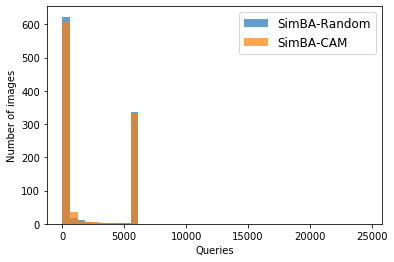

In [20]:
#plt.figure(figsize=(10,6))
plt.hist(rand_average_queries, range=(0,24578),  bins =40, label = 'SimBA-Random', alpha = 0.7)
plt.hist(cam_average_queries, range=(0,24578),  bins = 40, label = 'SimBA-CAM', alpha= 0.7)
plt.legend(fontsize=12)
plt.xlabel('Queries')
plt.ylabel('Number of images')
plt.show()